In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import gadget_reader as gd
import time_conversion as tiempo

#Parámetros cosmológicos
#--------------------------------------------------------------------------
h=0.732
G = 4.299e-6
a0=1.
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#------------------------------------------------------------------------
aa = np.loadtxt('redshift_outputs.txt')
isnap = aa[:,0]
aexp  = aa[:,2]
aexp  = aexp[::-1]
isnap = isnap[::-1]

z     = a0/aexp - 1.
Ht    = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
time  = tiempo.conv(z, h, omega_lambda, omega_matter)

print time 

lalala

afile = np.loadtxt('/z/omarioni/pyprogram_4096/newdata/M31_masscenter_time.dat')
xcm =  afile[:,1]
ycm =  afile[:,2]
zcm =  afile[:,3]


xfile = np.loadtxt('/z/omarioni/pyprogram_4096/newdata/part_barra.dat')
ID    = xfile[:,0]
tform = xfile[:,1]
rn_z0 = xfile[:,2]


path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096/SNAPS/snap_'

kk = range(0,len(ID), 100)
for i in range(0,len(ID)):
    if i in kk:
        print i
    for j in range(0,len(xcm)):
        
        if ((time[j] > tform[i]) & (time[j+1] < tform[i])):
#             print 'tiempo',time[j]
#             print 'tform', tform[i]
#             print 'snap', isnap[j]
            
            sim = gd.Open(path + str('%03d'%isnap[j]), endian='Big', gadget_type=2, verbose=False)
                             
            pstr = sim.Read('POS ',4)
            IDs  = sim.Read('ID  ',4)
            
#paso las coordenadas al centro de la galaxia y paso a coordenadas físicas
            xstr = (pstr[0,:]-xcm[j])*aexp[j]/h
            ystr = (pstr[1,:]-ycm[j])*aexp[j]/h
            zstr = (pstr[2,:]-zcm[j])*aexp[j]/h
                             
            rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)
                                        
            mask3, = np.where(IDs == ID[i])
#             print 'ID', ID[i]
#             print 'rn', rstr[mask3]
#             print 'tform', tform[i]
#             print 'rn_z0', rn_z0[i]

#-----------------------------------------------------------------------------
#Guargamos los parámetros en distintos archivos
#----------------------------------------------------------------------------------
#             archivo1 =  open('/z/omarioni/pyprogram_4096/newdata/tform_barra.dat','a')
#             archivo1.write(str('%15d'% ID[i]) +'\t'+
#                        str('%12.6f'% tform[i]) +'\t'+
#                        str('%12.6f'% rn_z0[i]) +'\t'+
#                        str('%12.6f'% rstr[mask3]) +'\n')
#             archivo1.close()


[13.86663323 13.84063729 13.81461045 13.7871804  13.76109011 13.7349689
 13.70881673 13.68125469 13.65503896 13.62879224 13.60251452 13.57620579
 13.54847888 13.52210647 13.49570302 13.46926851 13.44280295 13.41770165
 13.39117558 13.36461843 13.3380302  13.31141087 13.28476044 13.25807892
 13.23136629 13.20462255 13.1778477  13.15104174 13.12561791 13.09875137
 13.07327015 13.04634301 13.01938476 12.99381668 12.96679785 12.93974793
 12.91409301 12.88698253 12.85984097 12.83409925 12.80689717 12.78109814
 12.75383558 12.72797926 12.70065625 12.67474269 12.64735928 12.62138851
 12.59394475 12.56791683 12.54041277 12.51432776 12.48821499 12.46062141
 12.43445164 12.40679793 12.38057122 12.35431685 12.3265739  12.30026272
 12.27392392 12.24755753 12.22116359 12.1947421  12.16829309 12.14034486
 12.11383937 12.08730643 12.06074608 12.03415835 12.00606384 11.9794199
 11.95274867 11.92753413 11.90080992 11.8740585  11.84727992 11.82047421
 11.7936414  11.76678153 11.73989464 11.71298077 11.6

NameError: name 'lalala' is not defined

In [8]:
xfile = np.loadtxt('/z/omarioni/pyprogram_4096/newdata/part_barra.dat')
ID    = xfile[:,0]
tform = xfile[:,1]
rn_z0 = xfile[:,2]

print len(ID)

afile = np.loadtxt('/z/omarioni/pyprogram_4096/newdata/tform_barra.dat')

print len(afile[:,0])

dat = np.ndarray([len(ID), 4])
dat[:,0] = ID
dat[:,1] = afile[:,0]
dat[:,2] = afile[:,1]
dat[:,3] = afile[:,2]

np.savetxt('/z/omarioni/pyprogram_4096/newdata/tform_barra2.dat', dat, fmt=('%15d','%12.6f','%12.6f','%12.6f'))

186584
186522


ValueError: could not broadcast input array from shape (186522) into shape (186584)

-2137854448.0


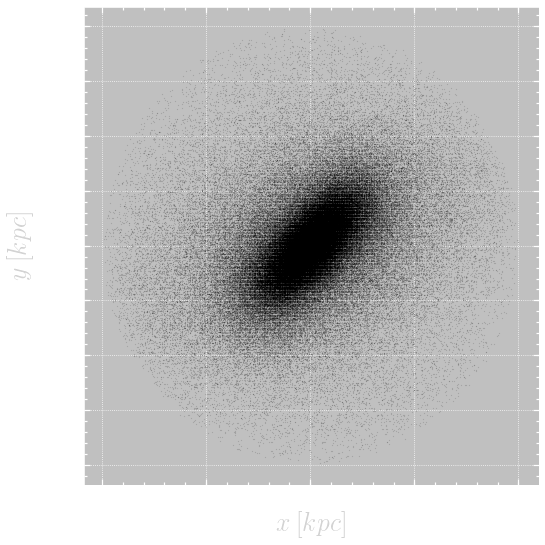

In [52]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
#     ax.plot(xn,yn,'.', markersize=0.1, color='k')
ax.plot(xstr[mask],ystr[mask],'.', markersize=0.1, color='k')
# ax.set_xlim(-50,50)
# ax.set_ylim(-50,50)
ax.spines['bottom'].set_color('w')
ax.spines['top'].set_color('w')
ax.spines['left'].set_color('w')
ax.spines['right'].set_color('w')
ax.minorticks_on()
ax.tick_params( labelsize=22, colors='lightgray')
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
ax.set_facecolor('silver')
ax.grid(color='w',linestyle=':',which='major')
#ax.grid(color='lightgray',linestyle=':',which='minor')
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26, color='lightgray')
plt.show()

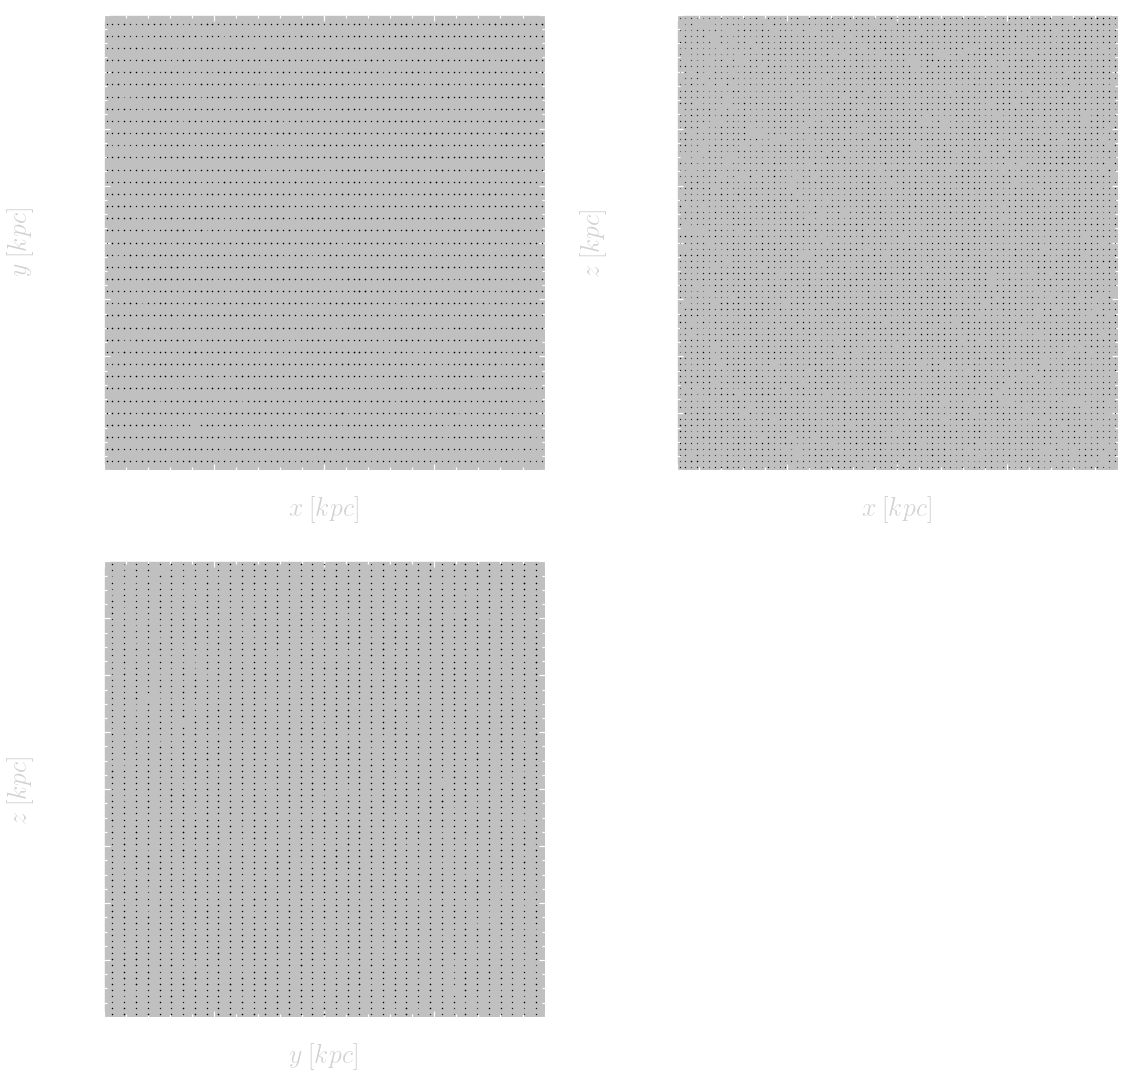

In [2]:
import gadget_reader as gd
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True


#Parámetros cosmológicos
#--------------------------------------------------------------------------
h = 0.732
G = 4.299e-6
a0 = 1.
H0 = h*100
omega_lambda = 0.716
omega_matter = 0.1277/(h**2.)
omega0 = omega_lambda + omega_matter
#---------------------------------------------------------------------------
aa = np.loadtxt('redshift_outputs.txt')
aexp  = aa[:,2]
aexp  = aexp[::-1]

afile = np.loadtxt('mass_center.dat')
xcm = afile[:,0]
ycm = afile[:,1]
zcm = afile[:,2]

xfile = np.loadtxt('part_barra.dat')
ID    = xfile[:,0]

bfile = np.loadtxt('r200_time.dat')
time  = bfile[:,1]
r200  = bfile[:,2]

path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096/SNAPS/'


snapshot=range(496,495,-1) #SNAPSHOTS
i=0
for isnap in snapshot:
    
    sim = gd.Open(path + 'snap_' + str('%03d'%isnap), endian='Big', gadget_type=2, verbose=False)
                             
    pstr = sim.Read('POS ',4)
    IDs  = sim.Read('ID  ',4)

#paso las coordenadas al centro de la galaxia y paso a coordenadas físicas
    xstr = (pstr[0,:]-xcm[i])*aexp[i]/h
    ystr = (pstr[1,:]-ycm[i])*aexp[i]/h
    zstr = (pstr[2,:]-zcm[i])*aexp[i]/h

    rstr = np.sqrt(xstr**2 + ystr**2 + zstr**2)

    rgal = 0.15*r200[i]
    
    mask, = np.where(rstr<2)
    mask2 = np.isin(IDs,ID)
#     mask3, = np.where(IDs == ID[3])

#     print ID[3]
#     print 'tform', tform[3]
    
#     print xn[mask3]
#     print xn[np.isin(IDs,ID)]
    
    fig=plt.figure(1,figsize=(16,16))
    fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.98, top = 0.95, wspace=0.3, hspace= 0.2)
    
    ax1=fig.add_subplot(221)
    ax1.plot(xstr[mask],ystr[mask],'.', markersize=0.3, color='k')
#     ax1.plot(xn[mask3],yn[mask3],'.', markersize=10, color='r')
    ax1.set_xlim(-0.1,0.1)
    ax1.set_ylim(-0.1,0.1)
    ax1.spines['bottom'].set_color('w')
    ax1.spines['top'].set_color('w')
    ax1.spines['left'].set_color('w')
    ax1.spines['right'].set_color('w')
    ax1.minorticks_on()
    ax1.tick_params( labelsize=22, colors='lightgray')
    ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
    ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
    ax1.set_facecolor('silver')
#     ax1.grid(color='w',linestyle=':',which='major')
    #ax1.grid(color='lightgray',linestyle=':',which='minor')
    ax1.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
    ax1.set_ylabel(r'$y\:[kpc]$',fontsize=26, color='lightgray')
#     circ= plt.Circle((0,0), radius=rgal, color='b',fill=False, ls='--')
#     ax1.add_patch(circ)
#     circ2= plt.Circle((0,0), radius=r200[i], color='m',fill=False, ls='--')
#     ax1.add_patch(circ2)
#     ax1.text(-330, 330, str('%.3f'%time[i])+'Gyr', 
#             fontsize=22, color='k', ha='left', va='top')
#     ax1.text(r200[i]*cos(pi/4.), r200[i]*sin(pi/4.), str('%12.3f'%r200[i])+'kpc', 
#             fontsize=18, color='k', ha='left', va='bottom') 
    
    
    ax2=fig.add_subplot(222)
    ax2.plot(xstr[mask],zstr[mask],'.', markersize=0.3, color='k')
#     ax2.plot(xn[mask3],zn[mask3],'.', markersize=10, color='r')
    ax2.set_xlim(-0.1,0.1)
    ax2.set_ylim(-0.1,0.1)
    ax2.spines['bottom'].set_color('w')
    ax2.spines['top'].set_color('w')
    ax2.spines['left'].set_color('w')
    ax2.spines['right'].set_color('w')
    ax2.minorticks_on()
    ax2.tick_params( labelsize=22, colors='lightgray')
    ax2.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
    ax2.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
    ax2.set_facecolor('silver')
#     ax2.grid(color='w',linestyle=':',which='major')
    #ax2.grid(color='lightgray',linestyle=':',which='minor')
    ax2.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
    ax2.set_ylabel(r'$z\:[kpc]$',fontsize=26, color='lightgray')
#     circ= plt.Circle((0,0), radius=rgal, color='b',fill=False, ls='--')
#     ax2.add_patch(circ)
#     circ2= plt.Circle((0,0), radius=r200[i], color='m',fill=False, ls='--')
#     ax2.add_patch(circ2)

    
    ax3=fig.add_subplot(223)
    ax3.plot(ystr[mask],zstr[mask],'.', markersize=0.3, color='k')
#     ax3.plot(yn[mask3],zn[mask3],'.', markersize=10, color='r')
    ax3.set_xlim(-0.1,0.1)
    ax3.set_ylim(-0.1,0.1)
    ax3.spines['bottom'].set_color('w')
    ax3.spines['top'].set_color('w')
    ax3.spines['left'].set_color('w')
    ax3.spines['right'].set_color('w')
    ax3.minorticks_on()
    ax3.tick_params( labelsize=22, colors='lightgray')
    ax3.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
    ax3.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
    ax3.set_facecolor('silver')
#     ax3.grid(color='w',linestyle=':',which='major')
    #ax3.grid(color='lightgray',linestyle=':',which='minor')
    ax3.set_xlabel(r'$y\:[kpc]$', fontsize=26, color='lightgray')
    ax3.set_ylabel(r'$z\:[kpc]$',fontsize=26, color='lightgray')
#     circ= plt.Circle((0,0), radius=rgal, color='b',fill=False, ls='--')
#     ax3.add_patch(circ)
#     circ2= plt.Circle((0,0), radius=r200[i], color='m',fill=False, ls='--')
#     ax3.add_patch(circ2)

#     fig.savefig('salida/'+str('%03d'%isnap)+'M31.png', 
#                 facecolor= 'k', frameon= 'True', dpi = 100)
#     plt.clf()
    plt.show()
    
    i += 1

In [7]:
maskaux = np.where((xstr<0.1)&(xstr>-0.1)&(ystr<0.1)&(ystr>-0.1)&(zstr<0.1)&(zstr>-0.1))

xx = np.sort(xstr[maskaux])
yy = np.sort(ystr[maskaux])

for i in range(0, len(xstr[maskaux])):
    print xx[i], yy[i]
    

-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235 -0.0960553
-0.0987235

In [23]:
import gadget_reader as gd

path = '/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096/SNAPS/'
sim = gd.Open(path + 'snap_496', endian='Big', gadget_type=2, verbose=False)
                             
pstr = sim.Read('POS ',4)

h=0.732

cm = [22997.92773, 32859.30859, 26703.25781]

xstr = (pstr[0,:]-cm[0])/h
ystr = (pstr[1,:]-cm[1])/h
zstr = (pstr[2,:]-cm[2])/h

r = np.sqrt(xstr**2 + ystr**2 + zstr**2)

mask, = np.where(r<0.1)

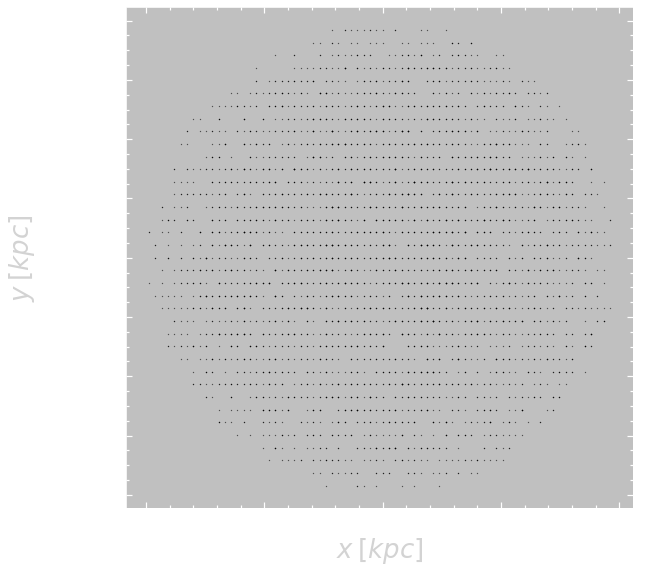

In [24]:
fig=plt.figure(1,figsize=(8,8))
fig.subplots_adjust(bottom=0.08, left =0.1, right = 0.98, top = 0.95, wspace=0.3, hspace= 0.2)
    
ax1=fig.add_subplot(111)
ax1.plot(xstr[mask], ystr[mask],'.', markersize=0.5, color='k')
#     ax1.plot(xn[mask3],yn[mask3],'.', markersize=10, color='r')
# ax1.set_xlim(31875.0,31875.1)
# ax1.set_ylim(45455.0,45450.1)
ax1.spines['bottom'].set_color('w')
ax1.spines['top'].set_color('w')
ax1.spines['left'].set_color('w')
ax1.spines['right'].set_color('w')
ax1.minorticks_on()
ax1.tick_params( labelsize=22, colors='lightgray')
ax1.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on',colors='w')
ax1.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on',colors='w')  
ax1.set_facecolor('silver')
#     ax1.grid(color='w',linestyle=':',which='major')
#ax1.grid(color='lightgray',linestyle=':',which='minor')
ax1.set_xlabel(r'$x\:[kpc]$', fontsize=26, color='lightgray')
ax1.set_ylabel(r'$y\:[kpc]$',fontsize=26, color='lightgray')
plt.show()